# Getting to the 'Heart' of the Problem

## Project Goals

<div class="alert alert-block alert-info">
    
- Identify some of the main drivers in heart disease.
    
    
- Use those drivers to build clusters, and classification models to predict if someone is likely to have heart disease.
    
    
- Create and deliver a final report that a non-technicl person can read and understand the steps taken and why.

## Imports Used

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

import wrangle as wr
import explore as ex
import model as mod

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
pd.options.display.max_columns = None

np.set_printoptions(suppress=True)

seed = 42

## Data Dictionary


|Feature|Definition|
|:----------|:-------------|
|heart_disease|**Target Variable**; Whether or not the patient has heart disease|
|bmi|The patients' bmi (body mass index)|
|smoker|Whether or not the patient smokes|
|heavy_drinker|Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week|
|stroke|Has the patients ever had a stroke|
|physical_health|Including physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)|
|mental_health|For how many days during the past 30 days was your mental health not good? (0-30 days)|
|difficulty_walking|Does the patient have serious difficulty walking or climbing stairs?|
|sex|Patients sex; male or female|
|age_group|Ages grouped up for every few years (18-24, 25-29, 30-34, ect)|
|race|The patients ethnicity (White,  black, hispanic, ect.)|
|diabetic|Ever been diagnosed with diabetes|
|physically_active|Adults who reported doing physical activity or exercise during the past 30 days other than their regular job|
|general_health|Would you say that in general your health is (Fair, good, poor, very good, ect.)|
|sleep_time|On average, how many hours of sleep do you get in a 24-hour period?|
|asthma|Ever been diagnosed with asthma|
|kidney_disease|Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?|
|skin_cancer|Ever been diagnosed with skin cancer|

# Acquiring my Data

<div class="alert alert-block alert-info">
    
1. I obtained the dataset through Kaggle on 2/13/23
    
    
2. The dataset was just shy of 320,000 rows, by 18 columns when I obtained it.
    
    
3. Each row represents a patient and each column a feature of that patient.

In [2]:
#pulling my data into the notebook
df = wr.get_heart_disease()

In [3]:
df.head(1)

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.6,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1


# Preparing my Data

<div class="alert alert-block alert-info">
    
1. In order to work with the data better, I cleaned it up quite a bit. The first thing I did was rename all of the columns to something more easily typed and read.
    
    
2. I then replaced all of the `No`s in each columns to `0`s, and all of the `Yes`s to `1`s
    
    
3. After that, I then removed some values from the `diabetic` column; I removed the entries that said either `Yes (during pregnancy)` or `No, borderline diabetes`, as those didn't add up to more than a couple thousand rows and made the data more difficult to work with. After that I was able to change the data type for the `diabetic` column to `integer`
    
    
4. Finally, I changed the `sex` column's entires to `1` for male, and `0` for female.
    
    
5. I did not end up removing any outliers, because, for the most part, doing so only removed patients on either end of the `bmi` scale, and I felt that, since people that are overweight are more at risk for heart disease, it would skew the data.

In [4]:
#all of my preparation was added to my `get_heart_disease` function from above

# Exploring my Data

<div class="alert alert-block alert-success">

When first reviewing the dataset, I came up with some initial questions I wanted to explore a bit more, to see what I could discover:
    
    
1. I first wanted to discover any relationships between some of what I believed to be main drivers in heart disease:
    
    - bmi
    
    - physical health
    
    - difficulty walking
    
    - age
    
    - physicallly active
    
    
2. Some other important questions I had were:
    
    - Is there a relationship between physical and mental health?
    
    - Are diabetes and bmi related to each other?
    
    - How closely related with heart disease is whether or not the patient has had a stroke?
    
    

In [5]:
#code to encode categorical columns as scaled data
df['age_group'] = df['age_group'].map(df['age_group'].value_counts(normalize=True))

encode = ['race','general_health','diabetic']

for i in encode:
    df[i] = df[i].map(df[i].value_counts(normalize=True))

In [6]:
df.head()

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3.0,30.0,0,0,0.092873,0.769619,0.131426,1,0.357169,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,0.075232,0.769619,0.868574,1,0.357169,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0.106637,0.769619,0.131426,1,0.107152,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0.067047,0.769619,0.868574,0,0.289366,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,0.065568,0.769619,0.868574,1,0.357169,8.0,0,0,0


In [7]:
#splitting my data
train, validate, test = wr.subset_df(df, stratify='heart_disease')

(186273, 18) (62091, 18) (62091, 18)


## Question 1 - How does bmi relate heart disease?

- Since my bmi column is a continuous variable (and normally distributed), and heart disease a categorical, I decided to use an independent t-test

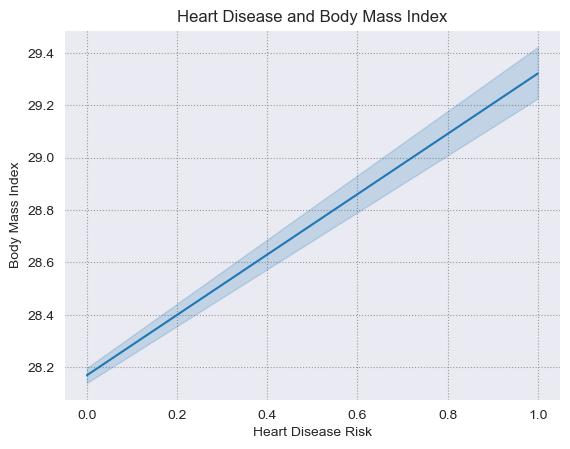

In [8]:
#function to create first visual
ex.viz_1(train)

In [9]:
#function to run an independent t-test
ex.ind_ttest_report(train['bmi'], train['heart_disease'])

T-statistic = 1918.2192
p-value     = 0.0
Is p-value < alpha? True


<div class="alert alert-block alert-success">
My main takeaway here is that there's clearly a relationship between a persons bmi and their risk of heart disease. Not exactly earthshattering information, but nice to confirm and look at a little closer. 

## Question 2 - How does physical activity related to heart disease?

- Because my physical activity column is also categorical, I performed a chi squared test to compare the two.

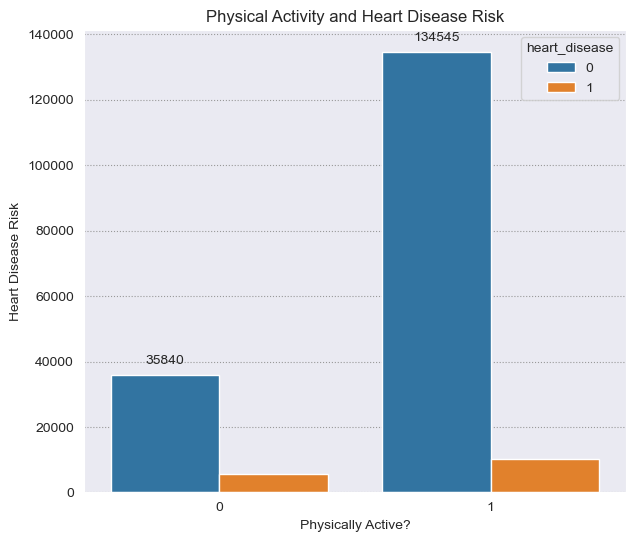

In [10]:
#function to create my second visual
ex.viz_2(train)

In [11]:
#function to run a chi squared test
ex.chi2_report(train, 'physically_active', 'heart_disease')

Observed Values

[[ 35840   5746]
 [134545  10142]]
---
Expected Values

[[ 38038   3547]
 [132346  12340]]
---

chi^2 = 1917.8223
p     = 0.0
Is p-value < alpha? True


<div class="alert alert-block alert-success">
My main takeaway here is that there is a relationship here, as shown by the results of my chi squared test. The relationship is simply that, as someone's physical activity levels increase, their risk of heart disease goes down.

## Question 3 - How does physical health, as defined in this dataset,  relate to heart disease?

- Since I want to know if there's a linear relationship between hypsical health and heart disease, I ran a pearson r test.

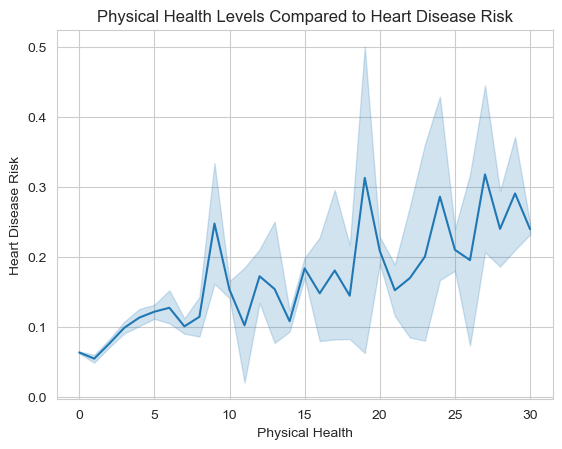

In [12]:
#function to run my third visual
ex.viz_3(train)

In [13]:
#function to run a pearson r test
ex.pearsonr_report(train['physical_health'], train['heart_disease'])

Correlation = 0.1732
p-value     = 0.0
Is p-value < alpha? True


<div class="alert alert-block alert-success">
As you can see, from the visual, the risk of heart disease is somewhat all over the place. According to my statistical test, there is a linear relationship between the two features, though it is somewhat minor.

## Question 4 - Is there a relationship betwen physical and mental health?

- Since I am looking for a relationship between the two features, I ran a chi squared test to compare the two

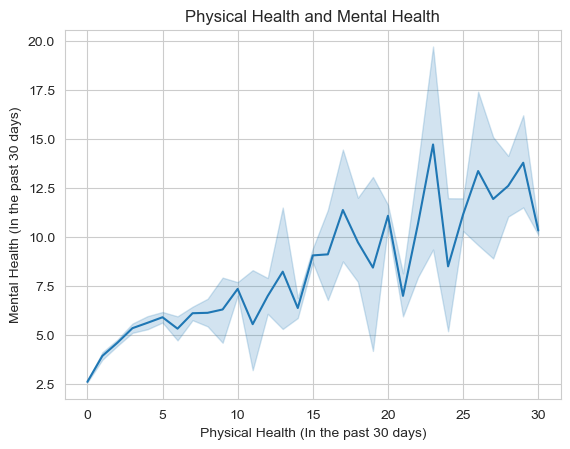

In [14]:
#function for visual 4
ex.viz_4(train)

In [15]:
#function to run a chi squared test
ex.chi_simple(train['physical_health'], train['mental_health'])

chi^2 = 40721.6308
p.    = 0.0
Is p-value < alpha? True


<div class="alert alert-block alert-success">
Visually looking at the data, it's hard to see anything definite, but according to my chi squared test there is a relationship between these two variables.

## Question 5 - Are diabetes and bmi related to each other?

- Since I have one categorical and one continuous variable here (and my bmi distribution is my only mostly normal feature), I ran a pearson r test. 

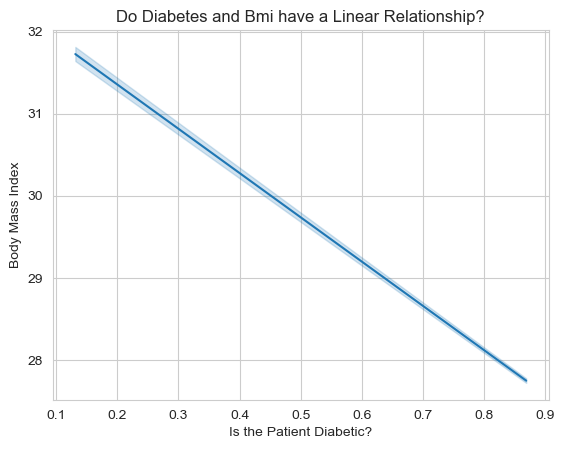

In [16]:
#function for visual 5
ex.viz_5(train)

In [17]:
#function to run a pearson r test
ex.pearsonr_report(train['bmi'], train['diabetic'])

Correlation = -0.2121
p-value     = 0.0
Is p-value < alpha? True


<div class="alert alert-block alert-success">
My main takeaway here is that, judging by both the visual, and the statistical test for linearity, there is a linear relationship here, although it's relatively weak.

## Exploration Main Takeaways

<div class="alert alert-block alert-info">
    
1. BMI and heart disease are related to each other.
    
    
2. Being more active has a positive effect on your risk of heart disease.
    
    
3. There is a weak linear relationship between physical health and heart disease.
    
    
4. According to my chi squared test, there is a significant relationship between physical and mental health.
    
    
5. There is a weak linear relationship between bmi and being diabetic.

# Modeling

<div class="alert alert-block alert-info">

- My initial goal with this project was the group features together to create useful clusters for the classification modeling. However, after several clusters and tests run, they were not found to be helpful, and will not be included in this notebook. They are, however, in my workbooks for viewing.

    
- Moving into my modeling phase, I determined that modeling for the best recall score should be my goal here. I believe that trying to determine the true positives (which are, in this case, the cases of people having heart disease) is more valuable than simply being accurate.

## Using XG Boost

In [18]:
#list for below function
cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']
#function to scale numerical data
train, validate, test = wr.scale_data(train, validate, test, MinMaxScaler(), cols)

In [19]:
#function to get my x and y subests of my data
X_train, y_train, X_validate, y_validate, X_test, y_test = mod.xy_subsets(train, validate, test, 'heart_disease')

In [20]:
X_train.head(1)

,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
131247,0.186164,0,0,0,1.0,0.0,0,0,0.067047,0.769619,0.868574,1,0.107152,0.304348,1,0,0


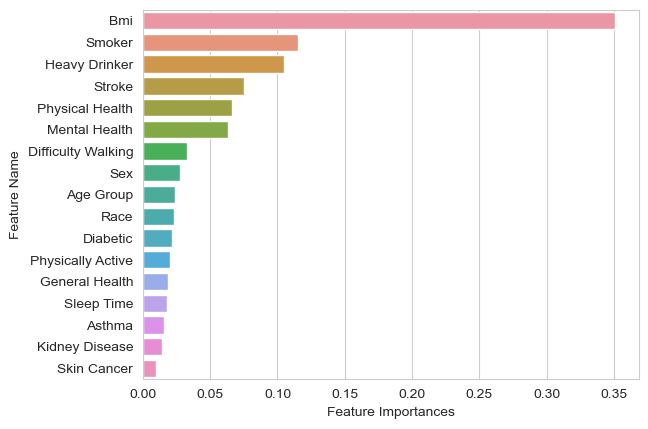

In [21]:
#function to get a plot for feature importances
mod.plot_feature_imp(X_train, y_train)

In [22]:
#lists needed for below function to work
max_depth = [4, 5, 6]
scale_pos_weight = [2, 3, 4]
learning_rate = [.1, .05, .01]
#function to loop through iterations of xgboost
results_df = mod.xg_boost1(X_train, y_train, X_validate, y_validate, X_test, y_test, max_depth, scale_pos_weight, learning_rate)

In [23]:
#line of code to sort the resulting dataframe by the test recall in descending order
results_df.sort_values('Test Recall', ascending=False).head(1)

,scale_pos_weight,learning_rate,max_depth,Train Accuracy,Train Recall,Validate Accuracy,Validate Recall,Test Accuracy,Test Recall
24,4,0.1,6,0.878436,0.530715,0.872268,0.484872,0.870867,0.496906


## Modeling Conclusions

<div class="alert alert-block alert-info">
- After iterating through many versions of each random forest, decsion tree, logistic regression, and xg boost models, one of my xg boost models ended up being the best for my target score. The recall went from being 0% with the baseline, to 50%. There is room for improvement, but even guessing the true positive case 50% of the time is significantly better than not at all. 
      

# Conclusions

## Summary

<div class="alert alert-block alert-success">
    
- Clustering was not particularly helpful for the end goal of this project, at least on the features I clustered on.

    
- BMI was by far the most significant factor in heart disease, according to this dataset.
    
    
- Age group, sleep time, and health were the most important factors (in that order).
    
    
- The kidney disease and drinking columns were the worst two when it comes to helping predict the target.

## Recommendations

<div class="alert alert-block alert-info">
    
- Based on the results of all of my models, my XG Boost model was far above the rest. Therefore I **would** recommend this model for production use.
    
    
- Additionally, I would recommend we send out some sort of communication with each patient predicted to be at risk with the model, so that they can take steps to ensure their health. 

## Next Steps

<div class="alert alert-block alert-success">

- There are a few things I would like to consider, going forward with this project:
    
    - I would like to compare more of the features with each other, both to get a better idea of how each relates to the other, but to potentially build clusters that end up being helpful.
    
    - I would also like to take more time to build more advanced functions, like with the xg boost function I have, to more quickly iterate through more models for the best time to performance efficiency.